In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import StockHistory
import seaborn as sns

In [48]:
names = StockHistory.get_namad_list()

In [76]:
sec_data = pd.DataFrame()
for n in names["NAMAD"]:
    d = StockHistory.get_namad_history_by_name(n,start_date='1390-1-1',from_cache=True)["ClosePrice"]
    if len(d) > 1700:
        sec_data[n] = d
sec_data.head()

,فسا,فرآور,سبزوا,وبملت,وآذر,رتكوح,غدام,وسپه,غدشت,خزاميا,...,ثباغ,ديران,بشهاب,بكاب,البرز,ختوقا,دپارس,شخارك,قشير,ولصنم
0,836.0,38027.0,2189.0,3196.0,5793.0,6796.0,25506.0,2495.0,51595.0,1158.0,...,2516.0,2722.0,10894.0,13976.0,1310.0,1793.0,9459.0,46749.0,5246.0,1498.0
1,785.0,38297.0,2218.0,3063.0,5693.0,6572.0,25890.0,2403.0,52033.0,1135.0,...,2490.0,2593.0,10381.0,13311.0,1308.0,1807.0,9745.0,46170.0,5009.0,1488.0
2,786.0,37720.0,2148.0,3089.0,5555.0,6576.0,25705.0,2379.0,52833.0,1083.0,...,2441.0,2476.0,10038.0,12678.0,1252.0,1790.0,9312.0,45961.0,4906.0,1484.0
3,782.0,37686.0,2234.0,3047.0,5304.0,6652.0,25529.0,2347.0,53439.0,1057.0,...,2401.0,2375.0,10159.0,12088.0,1228.0,1780.0,8917.0,45947.0,4894.0,1480.0
4,799.0,37994.0,2343.0,3092.0,5304.0,6989.0,25400.0,2449.0,55135.0,1074.0,...,2433.0,2369.0,10093.0,11513.0,1275.0,1817.0,9273.0,45975.0,5091.0,1525.0


In [77]:
sec_returns = np.log(sec_data / sec_data.shift(1))
sec_returns.head()

,فسا,فرآور,سبزوا,وبملت,وآذر,رتكوح,غدام,وسپه,غدشت,خزاميا,...,ثباغ,ديران,بشهاب,بكاب,البرز,ختوقا,دپارس,شخارك,قشير,ولصنم
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.062945,0.007075,0.013161,-0.042505,-0.017413,-0.033516,0.014943,-0.037571,0.008453,-0.020062,...,-0.010388,-0.048551,-0.048235,-0.048751,-0.001528,0.007778,0.029788,-0.012463,-0.046230,-0.006698
2,0.001273,-0.015181,-0.032069,0.008453,-0.024539,0.000608,-0.007171,-0.010038,0.015258,-0.046898,...,-0.019875,-0.046171,-0.033599,-0.048723,-0.043757,-0.009452,-0.045450,-0.004537,-0.020777,-0.002692
3,-0.005102,-0.000902,0.039257,-0.013690,-0.046237,0.011491,-0.006870,-0.013542,0.011405,-0.024300,...,-0.016522,-0.041647,0.011982,-0.047655,-0.019355,-0.005602,-0.043344,-0.000305,-0.002449,-0.002699
4,0.021506,0.008140,0.047638,0.014661,0.000000,0.049420,-0.005066,0.042542,0.031244,0.015955,...,0.013240,-0.002530,-0.006518,-0.048736,0.037559,0.020573,0.039147,0.000609,0.039464,0.029952


In [78]:
corr = sec_returns.corr()
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
corr_triu = corr_triu.stack()
corr_triu[(corr_triu <= 0.01) & (corr_triu >= -0.01)].to_frame().to_html("./data.html")


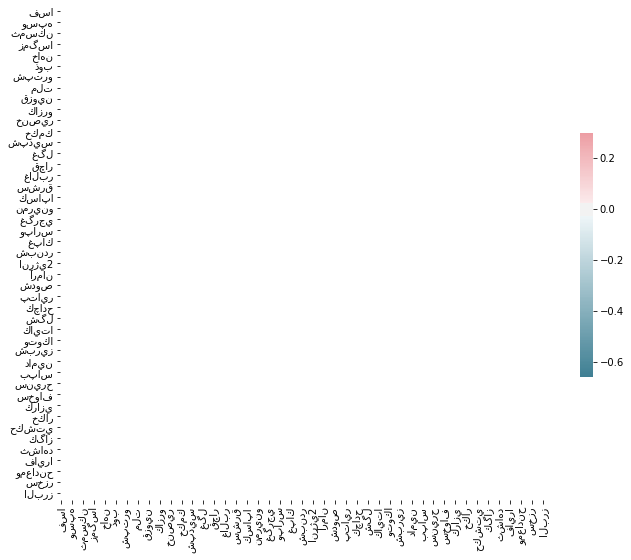

In [66]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})